In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import xgboost as xgb
####Data preparation
data=pd.read_csv("cancer.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.shape

(569, 32)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
##checking for null values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

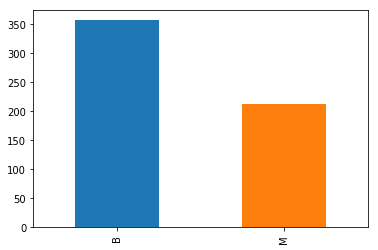

In [10]:
data.diagnosis.value_counts().plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6ACF8C668>,
      dtype=object)

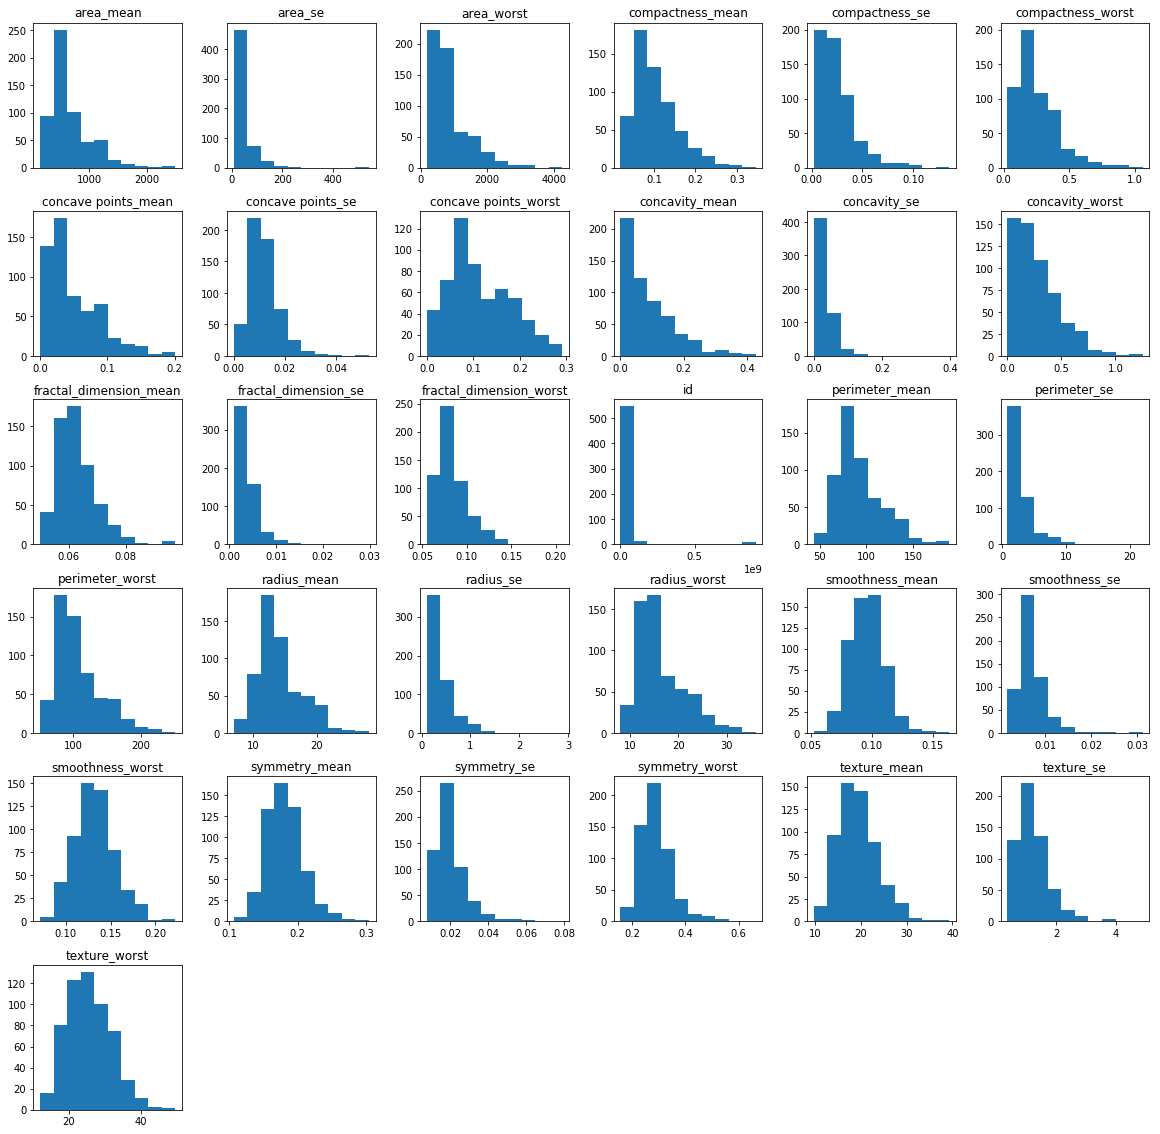

In [11]:
###virtualization-visual representation of data using histogram for each phase to get for each feature to get insides about the frequency of various feature values in data
data.hist(bins=10,figsize=(20,20),grid=False)

In [12]:
##encoding the categorical data
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column  
data['diagnosis']= label_encoder.fit_transform(data['diagnosis']) 
  

In [13]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [14]:
#feature subset selection
data.id.value_counts().unique()

array([1], dtype=int64)

In [15]:
data.drop('id',axis=1,inplace=True)

In [16]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
#dimensionality reduction
y=data['diagnosis']
x=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

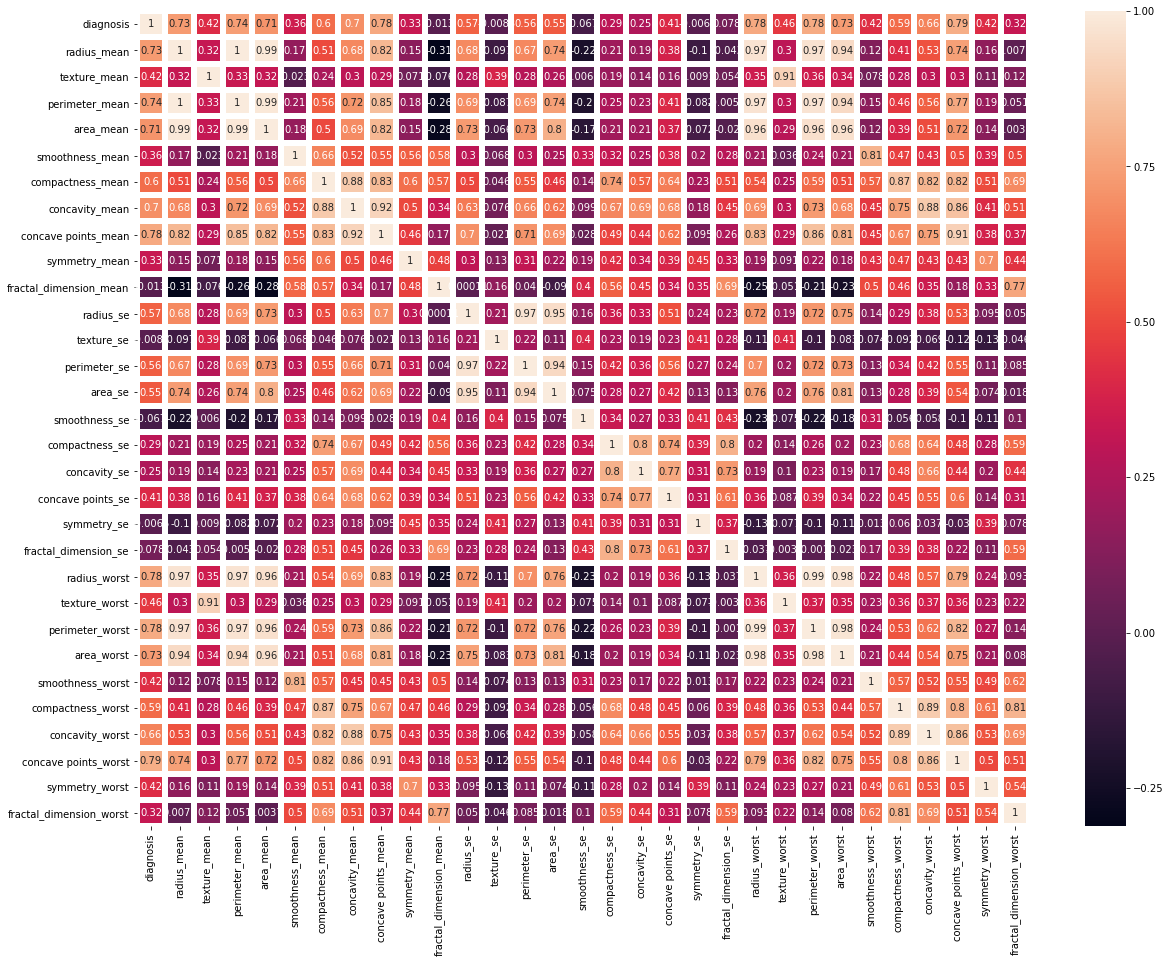

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,linewidth=5)

In [19]:
##the features with highest correlation with other features are [threshold=90%]
high_corr_pts=x[['radius_mean', 'perimeter_mean',
       'area_mean','radius_worst',
       'perimeter_worst']]

Text(0.5,1,'radius mean with respect to diagnosis')

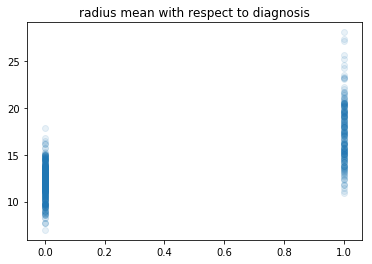

In [20]:
plt.scatter(data.diagnosis,data.radius_mean,alpha=0.1)
plt.title("radius mean with respect to diagnosis")

Text(0.5,1,'perimeter mean with respect to diagnosis')

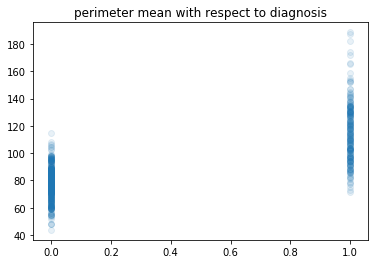

In [22]:
plt.scatter(data.diagnosis,data.perimeter_mean,alpha=0.1)
plt.title("perimeter mean with respect to diagnosis")

Text(0.5,1,'area mean with respect to diagnosis')

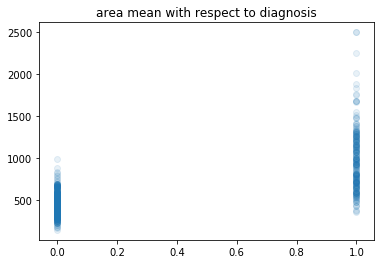

In [23]:
plt.scatter(data.diagnosis,data.area_mean,alpha=0.1)
plt.title("area mean with respect to diagnosis")

Text(0.5,1,'radius_worst with respect to diagnosis')

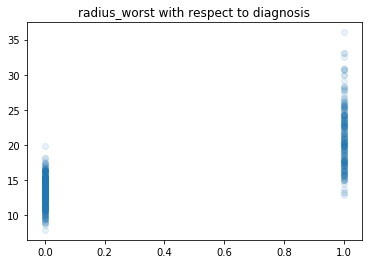

In [24]:
plt.scatter(data.diagnosis,data.radius_worst,alpha=0.1)
plt.title("radius_worst with respect to diagnosis")

Text(0.5,1,'perimeter_worst with respect to diagnosis')

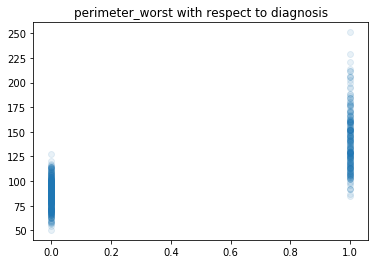

In [25]:
plt.scatter(data.diagnosis,data.perimeter_worst,alpha=0.1)
plt.title("perimeter_worst with respect to diagnosis")

In [26]:
##spilitting data into train(60%) and test(40%) sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

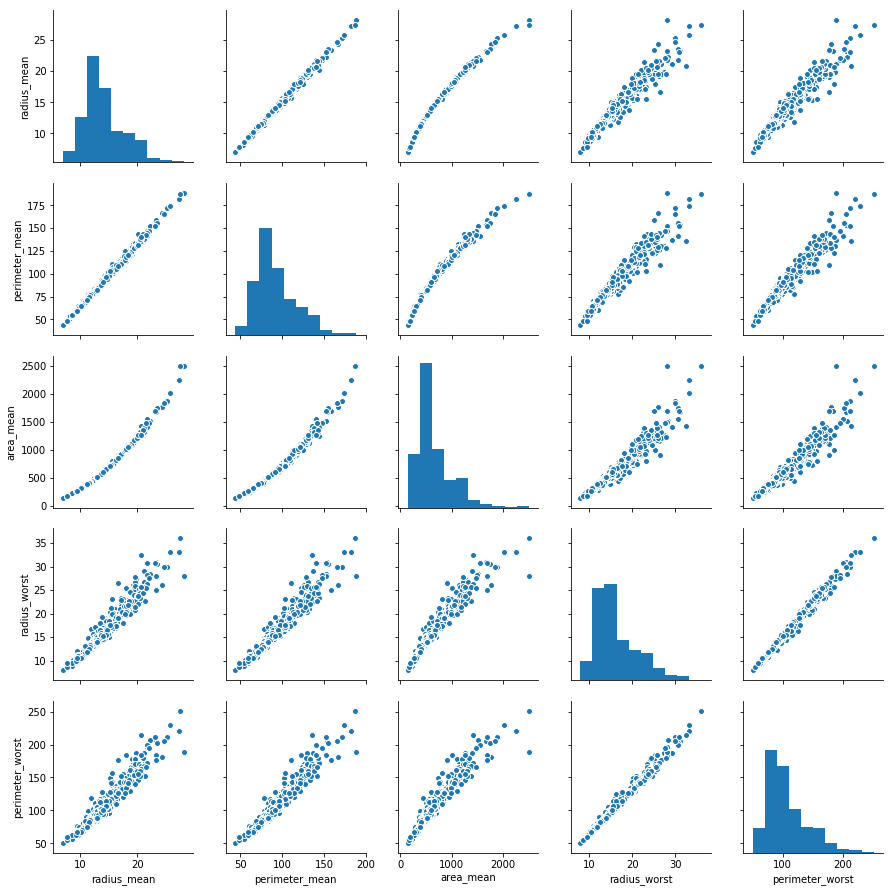

In [27]:
sns.pairplot(high_corr_pts)

In [28]:
##training the model and predicting the target variable

model_all=xgb.XGBClassifier()
model_all.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [29]:
pred=model_all.predict(X_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [30]:
accuracy_score(Y_test,pred)

0.9649122807017544

In [31]:
print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       145
          1       0.99      0.92      0.95        83

avg / total       0.97      0.96      0.96       228



In [32]:
confusion_matrix(Y_test,pred)

array([[144,   1],
       [  7,  76]], dtype=int64)

In [33]:
#Finding the optimal features
from sklearn.feature_selection import RFECV
clf=xgb.XGBClassifier()
rfecv=RFECV(estimator=clf,step=1,cv=4,scoring='accuracy')
rfecv=rfecv.fit(X_train,Y_train)
print('Optimal Number of Features:',rfecv.n_features_)
print('Best Feature:',X_train.columns[rfecv.support_])

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

Optimal Number of Features: 21
Best Feature: Index(['texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


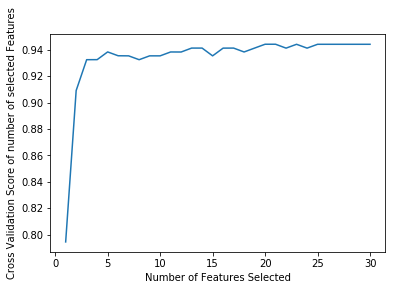

In [34]:
#plot number of features Vs Cross-validation score
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross Validation Score of number of selected Features")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [35]:
#Feature Ranking with recurrsive feature elimination and cross validation of the best number of features
importances=(model_all.feature_importances_)
indices=np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d, feature %d (%f)"%(f+1,indices[f],importances[indices[f]]))

Feature ranking:
1, feature 21 (0.136574)
2, feature 27 (0.101852)
3, feature 13 (0.099537)
4, feature 23 (0.074074)
5, feature 26 (0.057870)
6, feature 1 (0.057870)
7, feature 7 (0.055556)
8, feature 22 (0.041667)
9, feature 20 (0.041667)
10, feature 15 (0.041667)
11, feature 4 (0.039352)
12, feature 12 (0.037037)
13, feature 19 (0.034722)
14, feature 24 (0.030093)
15, feature 10 (0.016204)
16, feature 18 (0.016204)
17, feature 28 (0.016204)
18, feature 14 (0.013889)
19, feature 25 (0.013889)
20, feature 5 (0.011574)
21, feature 9 (0.011574)
22, feature 17 (0.009259)
23, feature 11 (0.009259)
24, feature 6 (0.009259)
25, feature 29 (0.006944)
26, feature 16 (0.006944)
27, feature 8 (0.004630)
28, feature 0 (0.004630)
29, feature 3 (0.000000)
30, feature 2 (0.000000)


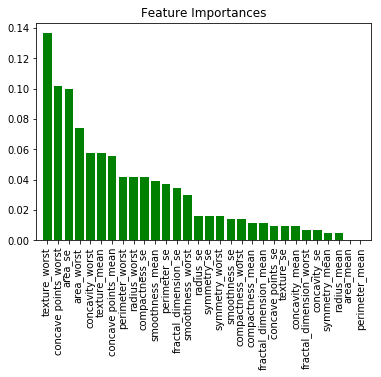

In [36]:
#plot
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]),importances[indices],color="g",align="center")
plt.xticks(range(X_train.shape[1]),X_train.columns[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.show()
plt.show()

In [37]:
#Training and analyzing the model with only the optimal features
X_train_optimal=X_train[[ 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']]
X_test_optimal=X_test[['texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']]
#load classifier in model_optimal (consider all optimal features)
model_optimal=xgb.XGBClassifier()
#training model
model_optimal.fit(X_train_optimal,Y_train)
#predict based on all testing features
pred=model_optimal.predict(X_test_optimal)
#get accuracy of model
accuracy_score(Y_test,pred)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9649122807017544